# <center>Analyzing customers for targeted marketing</center>

## 1.) Introduction
## 2.) Dataset
## 3.) Exploratory Data Analysis
## 4.) Data Wrangling
## 5.) Machine Learning
## 6.) Conclusion

### <center>Introduction</center>

#### An e-commerce clothing brand that wishes to break into a new market. Data is collected from a sample of potential customers from that market. Data includes behavioral spending patterns. The goal of this project is to cluster customers so the e-commerce company can target those customers who are more likely to spend on clothes. Lastly, we also have unseen data to test our algorithm.

### <center>Dataset</center>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("millenial_market_research.csv")


In [2]:
df.head()

,Age,Gender,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
0,17.0,male,7.3,8.1,2.8,1.6,4.5,7.1,0.3,0.6,...,2.9,9.9,4.4,1.4,8.7,6.7,9.7,8.6,9.5,8.2
1,21.0,female,9.4,9.3,2.2,2.2,3.2,9.5,5.4,1.3,...,0.6,3.0,5.7,4.5,5.3,9.5,5.3,3.5,4.2,10.0
2,19.0,female,6.8,7.5,6.4,2.1,7.8,4.4,1.9,5.8,...,4.7,4.4,2.7,8.5,10.0,3.5,3.5,5.2,0.1,3.1
3,26.0,female,4.5,6.8,1.3,8.5,8.0,7.4,1.5,6.2,...,1.1,1.8,5.5,9.8,5.1,7.0,3.5,2.3,0.3,7.2
4,19.0,female,9.1,9.8,1.4,3.9,3.1,5.4,8.2,4.7,...,4.5,4.4,5.1,5.0,6.8,3.0,2.0,5.9,5.6,8.2


### <center>Exploratory Data Analysis</center>

In [3]:
df.count()

Age                       10000
Gender                    10000
Music                     10000
Movies/Theaters           10000
Tech/Gadgets              10000
Museums                   10000
Food/Dining               10000
Camping/Hiking            10000
Concerts                  10000
Clubs/Dancing             10000
Writing                   10000
Sports                    10000
Gardening                 10000
Art                       10000
Shopping                  10000
Social Media              10000
Reading                   10000
Socializing               10000
Gaming                    10000
Entertainment Spending    10000
Clothing Spending         10000
Internet Spending         10000
Retail Spending           10000
dtype: int64

In [4]:
df.isnull().values.any()

False

In [5]:
df.isna().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Age                       10000 non-null float64
Gender                    10000 non-null object
Music                     10000 non-null float64
Movies/Theaters           10000 non-null float64
Tech/Gadgets              10000 non-null float64
Museums                   10000 non-null float64
Food/Dining               10000 non-null float64
Camping/Hiking            10000 non-null float64
Concerts                  10000 non-null float64
Clubs/Dancing             10000 non-null float64
Writing                   10000 non-null float64
Sports                    10000 non-null float64
Gardening                 10000 non-null float64
Art                       10000 non-null float64
Shopping                  10000 non-null float64
Social Media              10000 non-null float64
Reading                   10000 non-null float64
Socializing               10000 non-null float64
Gaming     

In [7]:
df.describe()

,Age,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,Writing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,20.386600,8.485650,8.221250,4.334410,4.226790,3.51436,6.339660,3.859940,3.683200,2.783220,...,3.694960,5.537580,5.471920,5.067150,8.144480,5.663800,5.422330,5.240530,4.785600,6.113950
std,2.780596,1.401132,1.488302,2.922271,2.702377,2.68117,2.471258,2.946626,3.085511,2.641601,...,2.597541,2.626148,2.617237,2.725082,1.537818,3.150193,2.438987,2.460029,2.631747,2.254891
min,15.000000,0.000000,0.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,8.200000,7.600000,1.700000,1.900000,1.20000,4.700000,1.300000,1.100000,0.875000,...,1.500000,3.500000,3.500000,2.900000,7.400000,2.700000,3.700000,3.400000,2.700000,4.600000
50%,20.000000,8.800000,8.600000,4.000000,4.000000,2.90000,6.700000,3.200000,2.500000,1.700000,...,3.300000,5.600000,5.500000,5.000000,8.600000,6.100000,5.400000,5.300000,4.700000,6.300000
75%,21.000000,9.400000,9.300000,6.700000,6.125000,5.40000,8.300000,6.000000,6.100000,4.200000,...,5.600000,7.700000,7.600000,7.300000,9.300000,8.600000,7.300000,7.100000,6.800000,7.800000
max,30.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
df.corr()

,Age,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,Writing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
Age,1.000000,-0.071404,-0.032861,0.049297,0.023706,0.034932,0.064568,-0.002136,-0.001543,0.032917,...,-0.031547,-0.123566,0.097224,0.037083,-0.076566,-0.043938,-0.043698,-0.079546,-0.012542,0.004743
Music,-0.071404,1.000000,0.168541,-0.002268,0.044854,-0.007305,0.080073,0.107177,0.101726,0.034163,...,0.041166,0.103254,0.028320,0.085666,0.197688,0.074207,0.045703,0.092160,0.004195,0.058070
Movies/Theaters,-0.032861,0.168541,1.000000,0.054879,0.054395,-0.021373,0.054241,0.056767,-0.034442,-0.007181,...,0.102754,0.121079,0.067204,0.082228,0.155671,0.108316,0.071656,0.065289,0.106014,0.010685
Tech/Gadgets,0.049297,-0.002268,0.054879,1.000000,-0.092826,-0.054901,0.005400,-0.062512,-0.051267,-0.168813,...,0.017955,-0.018813,0.307223,-0.173863,0.069157,0.016821,0.130339,0.072743,0.293165,0.059534
Museums,0.023706,0.044854,0.054395,-0.092826,1.000000,0.246781,0.245504,0.231917,0.282887,0.336356,...,0.032338,0.114030,0.021101,0.541309,0.070987,0.054911,0.026435,0.051895,-0.041650,0.094143
Food/Dining,0.034932,-0.007305,-0.021373,-0.054901,0.246781,1.000000,0.217308,0.147504,0.251260,0.194001,...,-0.071957,-0.012112,0.071891,0.180555,-0.042491,-0.041373,-0.083160,-0.059216,-0.060884,-0.026182
Camping/Hiking,0.064568,0.080073,0.054241,0.005400,0.245504,0.217308,1.000000,0.226031,0.216383,0.066437,...,-0.020716,0.032631,0.054334,0.211739,0.054368,0.109088,-0.070372,-0.056388,-0.048324,0.087006
Concerts,-0.002136,0.107177,0.056767,-0.062512,0.231917,0.147504,0.226031,1.000000,0.215670,0.153924,...,0.149597,0.250630,-0.053998,0.259666,0.144199,0.091409,0.007267,0.158383,-0.005129,0.079134
Clubs/Dancing,-0.001543,0.101726,-0.034442,-0.051267,0.282887,0.251260,0.216383,0.215670,1.000000,0.316432,...,-0.051388,-0.056642,0.041472,0.208205,0.039980,-0.011205,-0.022475,-0.033141,-0.046308,-0.025401
Writing,0.032917,0.034163,-0.007181,-0.168813,0.336356,0.194001,0.066437,0.153924,0.316432,1.000000,...,0.018504,0.001256,0.045665,0.247306,-0.038086,0.005247,-0.053478,0.003836,-0.044473,0.034375


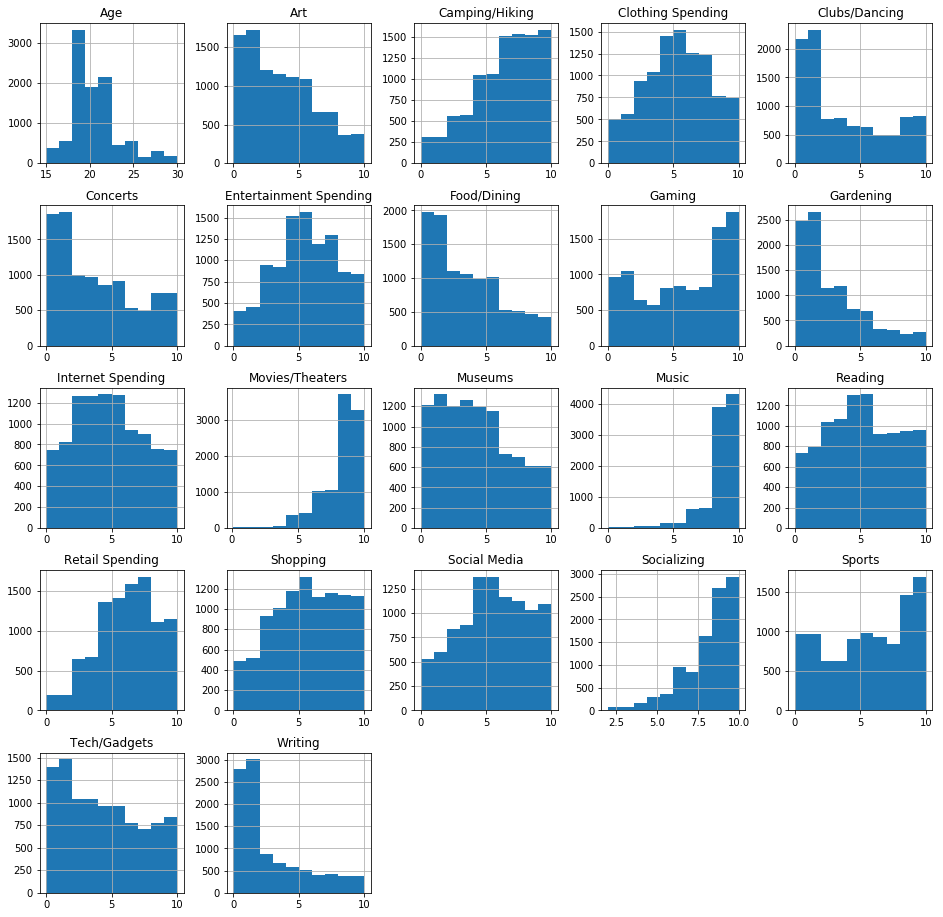

In [11]:
df.hist(figsize=(16,16))
plt.show()

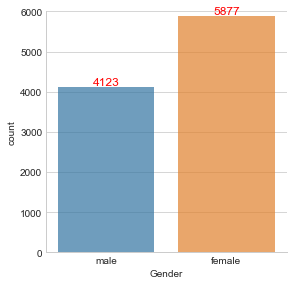

In [14]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 


sns.factorplot('Gender', data=df, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['Gender'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

plt.show()

### <center>Data Wrangling</center>

#### Fortunately, the data provided is pretty clean. All numerical categories except gender, which we will change in cells below. 
#### We are also interested in customers that spend on the internet as well as clothing. 

In [15]:
#changing categorical column to numerical
df['Gender'] = df['Gender'].map({'female': 1, 'male': 0})

In [16]:
df = df[(df['Clothing Spending'] > 5) & (df['Internet Spending'] > 5)]

In [17]:
df.head()

,Age,Gender,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
0,17.0,0,7.3,8.1,2.8,1.6,4.5,7.1,0.3,0.6,...,2.9,9.9,4.4,1.4,8.7,6.7,9.7,8.6,9.5,8.2
4,19.0,1,9.1,9.8,1.4,3.9,3.1,5.4,8.2,4.7,...,4.5,4.4,5.1,5.0,6.8,3.0,2.0,5.9,5.6,8.2
18,20.0,1,9.7,9.4,5.1,4.4,0.7,5.8,0.7,1.7,...,5.0,10.0,3.6,4.8,9.4,8.5,7.4,7.2,6.2,6.4
20,19.0,0,7.4,9.8,6.4,4.6,3.7,5.8,1.5,1.0,...,4.9,7.2,0.3,4.6,7.7,7.3,4.8,5.3,5.7,5.2
21,19.0,0,6.6,8.5,9.5,7.5,0.4,9.4,8.6,5.4,...,4.8,5.6,7.5,7.9,2.2,1.7,8.6,5.1,5.4,4.2


### <center>Machine Learning</center>

#### A big part of machine learning is to decide which algorithm and why. 

#### For any type of segmenting problem, a clustering algorithm works really well. It detects certain behaviors and patterns and its able to separate them into clusters. This in fact is exactly what we need, a market segmentation solution.

#### In the real world, you would want to try out a couple of clustering algorithms, test their performance, and ultimately choose the best one. For this project we will try K-means clustering. Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

#### A well known supplement for k-means is called Principal Component Analysis which helps emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize. K-means and PCA are usually thought of as two very different problems: one as an algorithm for data clustering, and the other as a framework for data dimension reduction, but combined together they work really well.

In [18]:
# eliminating for now, variables that represent behaviors
abt = df.drop(['Entertainment Spending',
               'Clothing Spending',
               'Internet Spending',
               'Retail Spending'], axis=1)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pca.fit( abt )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

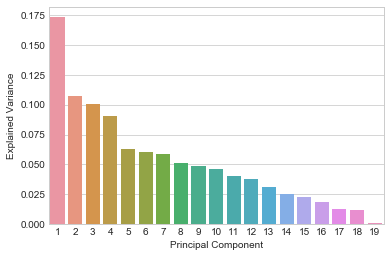

In [21]:
# Explained Variance Ratio
sns.barplot(x=np.arange(pca.n_components_) + 1,
            y=pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

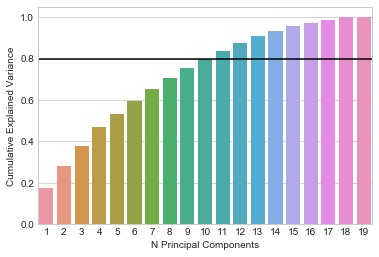

In [22]:
# Cumulative Explained Variance
cumulative = np.cumsum(pca.explained_variance_ratio_)
sns.barplot(x=np.arange(pca.n_components_) + 1,
            y=cumulative)
plt.xlabel('N Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.8, color='k', linestyle='-')
plt.show()

#### Capture atleast 80% of the variance

In [23]:
from sklearn.cluster import KMeans

In [24]:
# PCA transformation
pc_df = pd.DataFrame( pca.transform(abt) )

# Rename Columns
pc_df.columns = ['PC{}'.format(n+1) for n in np.arange(pca.n_components_)]

pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-4.718882,-2.960997,1.116481,2.548510,-0.199757,-1.365595,-0.791734,-5.314410,2.321042,-2.127782,2.549628,-0.703628,0.477296,-2.276950,2.987285,1.136840,0.809147,0.100033,0.606076
1,0.491975,1.380983,1.128373,6.301044,-0.359154,0.709515,-1.014473,1.097250,1.166798,0.156752,1.311644,1.418522,-0.526075,0.050525,-2.956461,0.213495,-0.668280,-1.945622,-0.374975
2,-2.770408,-4.774232,1.598379,0.078869,-0.386427,-0.448358,-1.733045,-1.781863,-2.426829,-2.196854,1.731944,-2.267540,-1.811011,-1.876973,1.532407,-1.276738,-0.521122,-0.068454,-0.291319
3,-3.041096,-3.171436,0.658393,2.253144,0.320050,-0.796833,-2.609572,-2.273643,-1.241404,-5.576016,-1.677364,-1.871108,-0.712583,-0.352017,0.611251,0.482353,0.841736,-1.471987,0.608281
4,2.375304,1.511895,-0.941456,-0.373477,1.079997,-4.262592,0.463675,7.823742,0.350148,1.699506,-1.973704,-1.237663,0.716793,-0.425342,-2.357721,5.414301,-1.630552,-4.333861,0.544460


In [25]:
# Create training set
pcs_to_keep = ['PC{}'.format(n+1) for n in np.arange(11)]
X_train = pc_df[pcs_to_keep]

# Train K-Means clustering algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
def predict_clusters(raw_data, trained_pca, trained_kmeans, n_pc):
    df_new = raw_data.copy()
    
    # Filter to our target audience
    df_new = df_new[(df_new['Clothing Spending'] > 5) 
                    & (df_new['Internet Spending'] > 5)]
    
    # Engineer Features
    df_new.rename(columns={'Gender':'Female'}, inplace=True)
    df_new.Female.replace({'female':1, 'male':0}, inplace=True)
    abt_new = df_new.drop(['Entertainment Spending',
                           'Clothing Spending',
                           'Internet Spending',
                           'Retail Spending'], axis=1)
    
    # PCA transformation
    pc_df_new = pd.DataFrame( trained_pca.transform(abt_new) )

    # Rename Columns
    pc_df_new.columns = ['PC{}'.format(n+1)
                         for n in np.arange(trained_pca.n_components_)]
    
    # Create test set
    pcs_to_keep = ['PC{}'.format(n+1) for n in np.arange(n_pc)]
    X_new = pc_df_new[pcs_to_keep]

    # Predict clusters
    df_new['Cluster'] = trained_kmeans.predict(X_new)
    
    return df_new[['Age', 'Female', 'Clothing Spending', 'Internet Spending', 'Cluster']]

In [27]:
raw_df = pd.read_csv('unseen_raw_data.csv')

raw_df

,Age,Gender,Music,Movies/Theaters,Tech/Gadgets,Museums,Food/Dining,Camping/Hiking,Concerts,Clubs/Dancing,...,Art,Shopping,Social Media,Reading,Socializing,Gaming,Entertainment Spending,Clothing Spending,Internet Spending,Retail Spending
0,21.0,female,9.5,7.2,0.8,3.5,3.8,9.1,0.8,1.0,...,5.8,4.2,5.7,4.7,7.8,8.8,4.0,7.8,5.7,6.8
1,23.0,female,9.1,8.6,3.3,5.5,3.8,6.5,6.1,2.5,...,5.4,4.2,6.7,3.1,8.0,8.4,4.8,7.0,4.7,5.3
2,19.0,female,8.2,9.5,0.9,4.3,4.1,9.9,2.1,1.4,...,9.5,4.2,0.9,6.3,8.2,9.2,4.0,2.7,3.7,3.7
3,19.0,female,8.8,6.3,0.1,3.9,3.2,9.4,9.5,1.9,...,1.9,5.1,0.0,2.4,8.4,0.9,3.7,2.0,2.8,6.5
4,22.0,female,9.6,9.9,4.5,5.6,1.0,6.8,1.2,1.4,...,2.7,5.1,8.3,4.1,8.4,1.6,9.5,5.7,3.1,7.5
5,19.0,male,9.0,7.0,5.6,5.2,6.4,9.6,8.7,8.1,...,0.7,1.8,9.8,6.2,8.3,1.1,6.0,3.4,4.3,5.2
6,21.0,male,8.4,7.7,2.3,2.1,8.9,8.3,1.3,9.5,...,4.0,6.8,8.0,0.6,8.3,5.7,6.7,5.1,4.4,5.1
7,20.0,male,9.7,8.5,6.8,4.7,0.4,2.8,1.9,0.7,...,4.5,5.4,5.4,3.6,7.7,5.5,5.5,4.4,5.2,5.8
8,28.0,male,9.9,8.2,1.2,0.7,5.4,8.1,0.7,4.3,...,5.2,2.3,9.9,7.8,8.1,0.6,6.7,4.2,2.4,9.1
9,19.0,female,10.0,9.3,3.8,9.8,4.3,6.5,6.1,0.3,...,4.4,6.2,4.9,9.8,9.3,8.3,5.7,6.2,3.0,4.3


In [29]:
pred_df = predict_clusters(raw_df, pca, kmeans, 11)

pred_df
#THESE ARE THE CUSTOMERS THAT THE E-COMMERCE COMPANY NEEDS TO TARGET

,Age,Female,Clothing Spending,Internet Spending,Cluster
0,21.0,1,7.8,5.7,1
11,20.0,0,5.3,6.7,1
17,18.0,1,8.4,5.9,1
21,28.0,1,7.4,7.3,0
26,18.0,0,5.4,5.1,2
28,22.0,1,6.4,6.7,0
29,19.0,0,6.0,8.9,2
33,30.0,0,6.3,6.1,0
47,26.0,0,7.5,7.1,0
48,23.0,1,7.2,6.0,1


### <center>Conclusion</center>

#### In conclusion, we we're able tu succesfuly cluster those customers that have a high probability of spending online on clothing for the e-commerce company. As I said before, the ideal scenario would be to deploy 10+ models and observed their performance over some time. It would be incorrect to state that our algorithm is the "best", however it does accomplish the task with a certain level of success.